In [2]:
from google.colab import files
import pandas as pd

# Upload the file from your local machine
uploaded = files.upload()

# After the upload, read the CSV into a DataFrame
mba_salary_df = pd.read_csv("MBA Salary.csv")  # Adjust the filename if needed

# Print the first 10 rows of the DataFrame
print(mba_salary_df.head(10))


Saving MBA Salary.csv to MBA Salary.csv
   S. No.  Percentage in Grade 10  Salary
0       1                   62.00  270000
1       2                   76.33  200000
2       3                   72.00  240000
3       4                   60.00  250000
4       5                   61.00  180000
5       6                   55.00  300000
6       7                   70.00  260000
7       8                   68.00  235000
8       9                   82.80  425000
9      10                   59.00  240000


In [9]:
!pip install statsmodels

In [8]:
import statsmodels.api as sm
X = sm.add_constant(mba_salary_df['Percentage in Grade 10'])
X.head(5)

,const,Percentage in Grade 10
0,1.0,62.00
1,1.0,76.33
2,1.0,72.00
3,1.0,60.00
4,1.0,61.00


In [7]:
Y = mba_salary_df['Salary']
Y.head(5)

,Salary
0,270000
1,200000
2,240000
3,250000
4,180000


In [10]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split( X,  Y,  train_size = 0.8,   random_state = 100 )
mba_salary_lm = sm.OLS( train_y, train_X ).fit()
print( mba_salary_lm.params )

const                     30587.285652
Percentage in Grade 10     3560.587383
dtype: float64


In [11]:
mba_salary_lm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Ordinary least squares
===================================================================================
Model:                    OLS                   Adj. R-squared:          0.190     
Dependent Variable:       Salary                AIC:                     1008.8680 
Date:                     2025-03-05 07:02      BIC:                     1012.2458 
No. Observations:         40                    Log-Likelihood:          -502.43   
Df Model:                 1                     F-statistic:             10.16     
Df Residuals:             38                    Prob (F-statistic):      0.00287   
R-squared:                0.211                 Scale:                   5.0121e+09
-----------------------------------------------------------------------------------
                         Coef.     Std.Err.    t    P>|t|     [0.025       0.975]  
-----------------------------------------------------------------------------------
const                  30587.2857 71869.4497 0.4256 0.6728 -114904.8088 176079.3801
Percentage in Grade 10  3560.5874  1116.9258 3.1878 0.0029    1299.4892   5821.6855
-----------------------------------------------------------------------------------
Omnibus:                    2.048              Durbin-Watson:                 2.611
Prob(Omnibus):              0.359              Jarque-Bera (JB):              1.724
Skew:                       0.369              Prob(JB):                      0.422
Kurtosis:                   2.300              Condition No.:                 413  
===================================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly
specified.
"""

In [12]:
pred_y = mba_salary_lm.predict(test_X)
print(pred_y.head())

6     279828.402452
36    272707.227686
37    215737.829560
28    237101.353858
43    295851.045675
dtype: float64


Mean Squared Error: 3480554701.90
R² Score: 0.38
Intercept: 106610.49, Slope: 2374.23


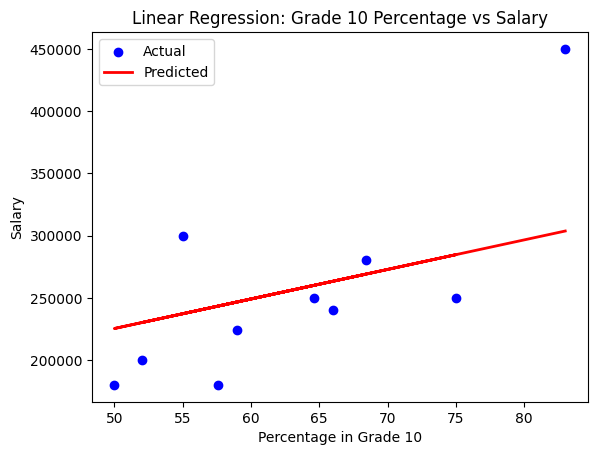

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df= pd.read_csv('MBA Salary.csv')
# Extract relevant columns using column names
X = df[['Percentage in Grade 10']].values  # Independent variable
y = df[['Salary']].values  # Dependent variable

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"Intercept: {model.intercept_[0]:.2f}, Slope: {model.coef_[0][0]:.2f}")

# Plot the results
plt.scatter(X_test, y_test, color='blue', label="Actual")
plt.plot(X_test, y_pred, color='red', linewidth=2, label="Predicted")
plt.xlabel("Percentage in Grade 10")
plt.ylabel("Salary")
plt.legend()
plt.title("Linear Regression: Grade 10 Percentage vs Salary")
plt.show()